# SERIES TEMPORALES: MODELOS PREDICTIVOS
## Causal IMpact (Google)

`v2.2`
---




Bibliografía
============



- INFERRING CAUSAL IMPACT USING BAYESIAN STRUCTURAL TIME-SERIES MODELS  
  BY KAY H. BRODERSEN, FABIAN GALLUSSER, JIM KOEHLER, NICOLAS REMY AND STEVEN L. SCOTT  
  The Annals of Applied Statistics  
  2015, Vol. 9, No. 1, 247–274  

    [http://google.github.io/CausalImpact/CausalImpact.html](http://google.github.io/CausalImpact/CausalImpact.html)






Análisis Causal de Impactos
===========================

<https://github.com/google/CausalImpact>  
<https://google.github.io/CausalImpact/CausalImpact.html>


Un problema importante en marketing es inferir la
causalidad que una intervención de mercado, ha ejercido sobre un resultado
medido en el tiempo. 

Es un modelo de espacio de los estados  de regresión de difusa que predice cual sería la respuesta de mercado si no se produjo ninguna intervención. 

A diferencia de la propuesta clásica de contrastes por diferencias
este modelo permiten:  
 	  (i) inferir la evolución temporal del impacto atribuible,     
  	(ii) incorporar priores empíricos sobre los parámetros en un tratamiento totalmente bayesiano, y    
	  (iii) acomodar flexiblemente  fuentes de variación, incluidas las tendencias locales, la estacionalidad y la influencia de las covariables contemporáneas.    

Utiliza un modelo Bayesian Structural Time Series (BSTS)

Esta metodología utiliza un algoritmo MCMC para la inferencia posterior.

Como ejemplo práctico estiman el efecto causal de una campaña publicitaria online sobre
visitas del sitio. 






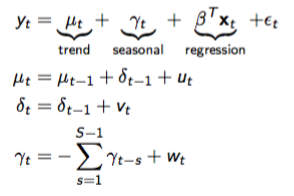

Scott, Steven, and Hal Varian. 2014. “Predicting the Present with Bayesian Structural Time Series” 5. Inderscience Publishers Ltd: 4–23.

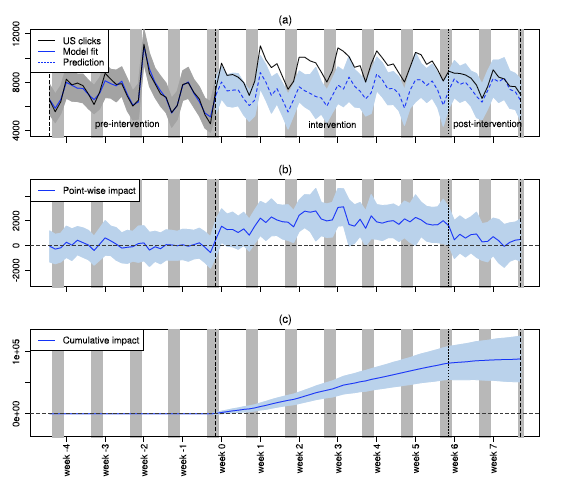

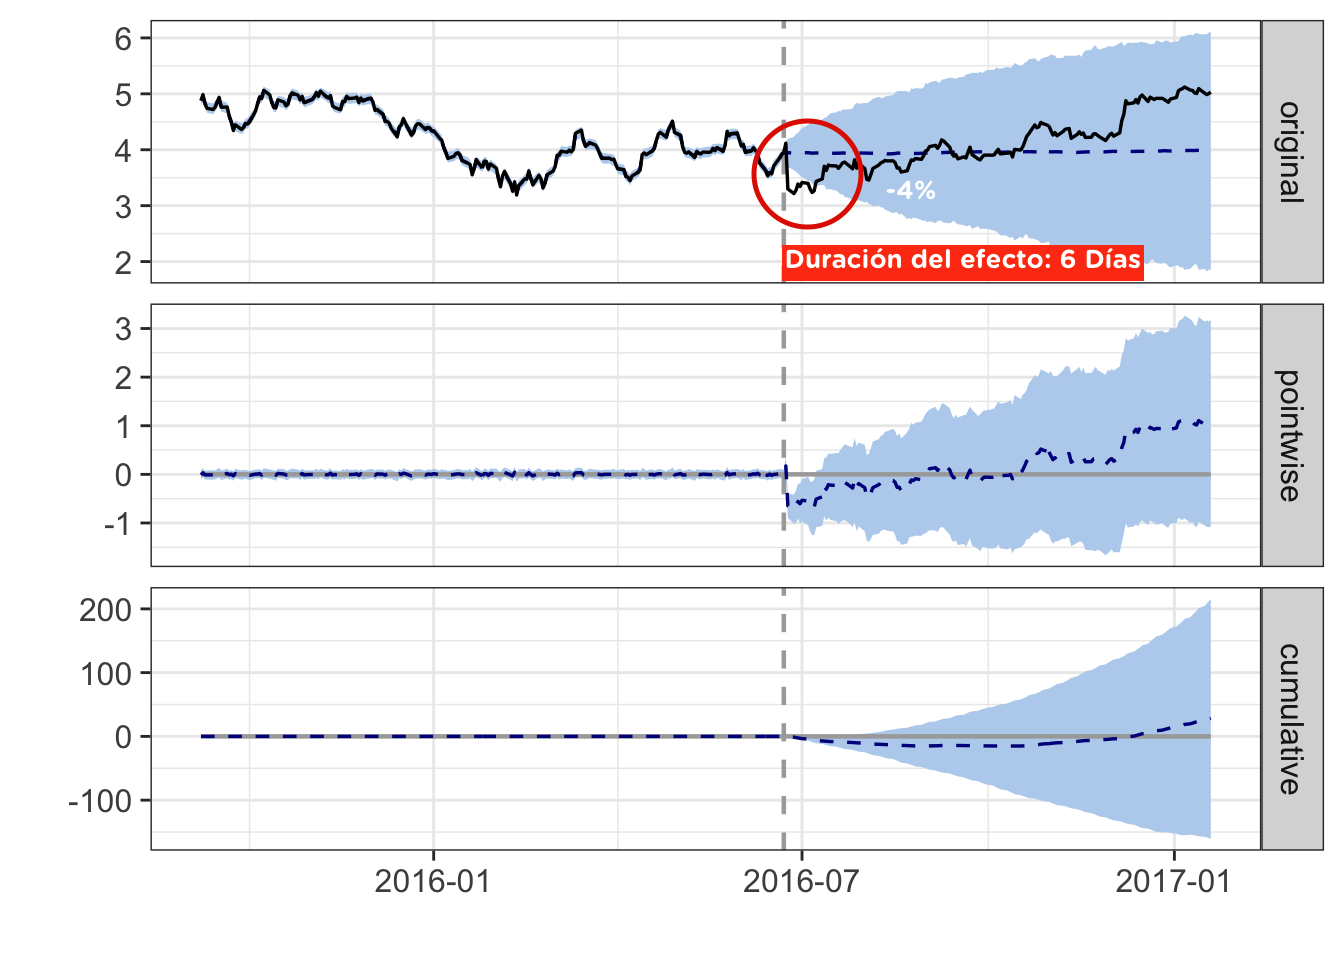

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#!pip install --target=$nb_path pycausalimpact

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

# Ejemplo Simulación EFECTO ESCALÓN

In [ ]:

np.random.seed(12345)
ar = np.r_[1, 0.9]
ma = np.array([1])

# Generar una serie temporal con un escalon
arma_process = ArmaProcess(ar, ma)
X = 100 + arma_process.generate_sample(nsample=100)
y = 1.2 * X + np.random.normal(size=100)

In [ ]:
y

In [7]:
y_inicial=1.0*y
y[70:] += 5 # escalon
data_ini = pd.DataFrame({'y': y, 'y_inicial': y_inicial}, columns=['y', 'y_inicial']) # columnas con nombre y ,X
data = pd.DataFrame({'y': y, 'X': X}, columns=['y', 'X']) # columnas con nombre y ,X

In [8]:
data_ini

,y,y_inicial
0,118.188694,118.188694
1,120.233276,120.233276
2,118.627775,118.627775
3,119.609722,119.609722
4,121.391508,121.391508
...,...,...
95,131.838436,126.838436
96,118.786121,113.786121
97,127.362025,122.362025
98,123.600675,118.600675


In [9]:

pre_period = [0, 69]
post_period = [70, 99]

ci = CausalImpact(data, pre_period, post_period)
print(ci.summary())


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    125.23             3756.86
Prediction (s.d.)         120.39 (0.28)      3611.81 (8.3)
95% CI                    [119.82, 120.91]   [3594.71, 3627.26]

Absolute effect (s.d.)    4.84 (0.28)        145.06 (8.3)
95% CI                    [4.32, 5.41]       [129.6, 162.16]

Relative effect (s.d.)    4.02% (0.23%)      4.02% (0.23%)
95% CI                    [3.59%, 4.49%]     [3.59%, 4.49%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [10]:
print(ci.summary(output='report'))


Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 125.23. By contrast, in the absence of an
intervention, we would have expected an average response of 120.39.
The 95% interval of this counterfactual prediction is [119.82, 120.91].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 4.84 with a 95% interval of
[4.32, 5.41]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 3756.86.
By contrast, had the intervention not taken place, we would have expected
a sum of 3611.81. The 95% interval of this prediction is [3594.71, 3627.26].


The above results are given in terms of absolute numbers. In relative
terms, the response v

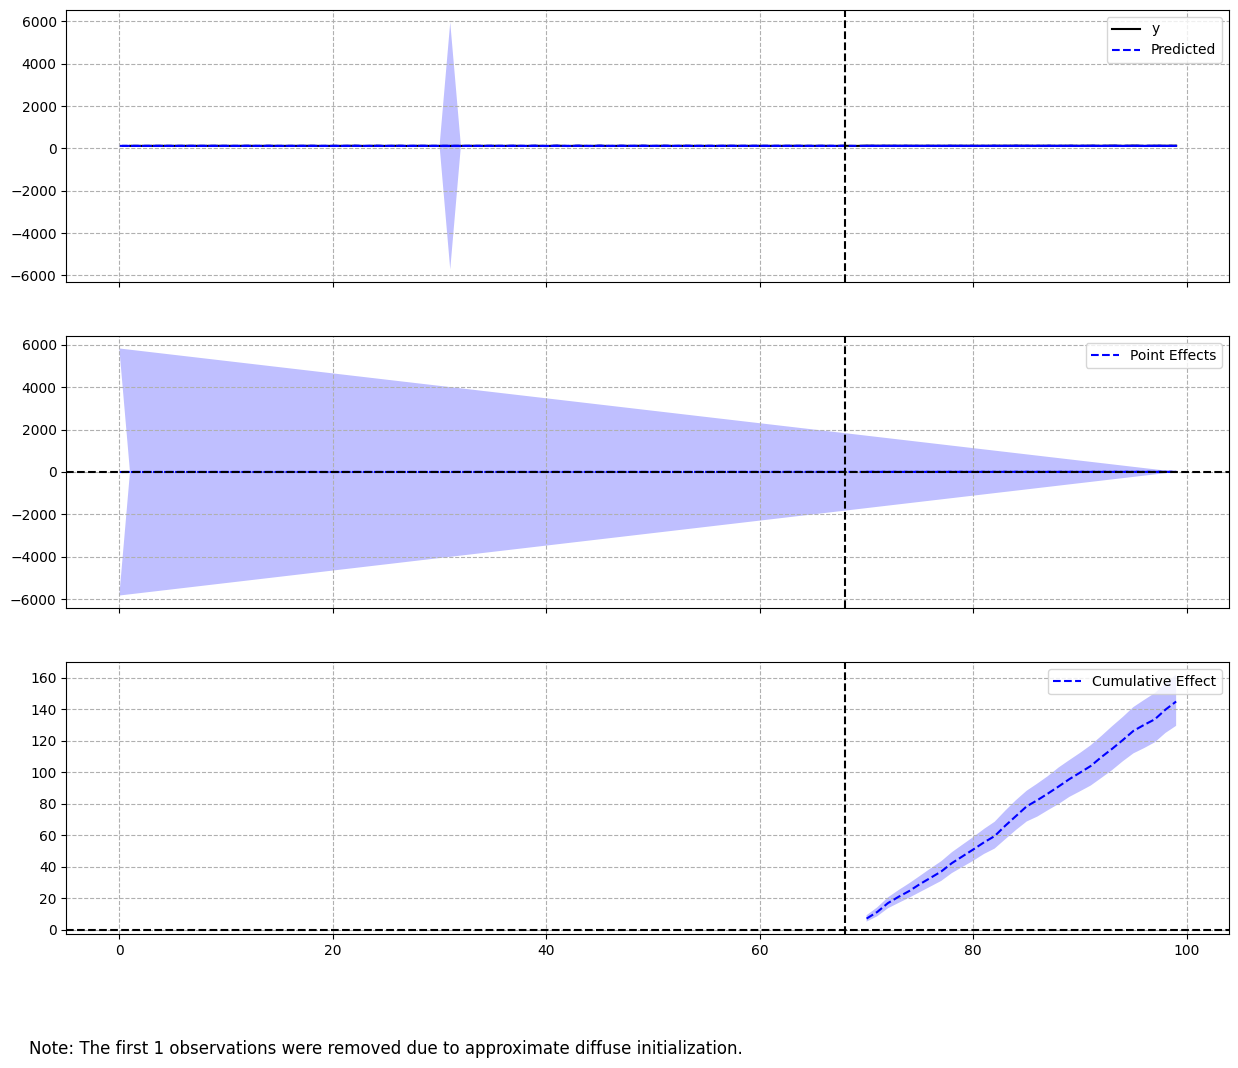

In [11]:

ci.plot()

# Ejemplo Efecto Acumulado


In [12]:
data = pd.read_csv('comparison_data.csv', index_col=['DATE'])
pre_period = ['2019-04-16', '2019-07-14']
post_period = ['2019-7-15', '2019-08-01']


In [13]:
data

,CHANGED,NOT_CHANGED_1,NOT_CHANGED_2,NOT_CHANGED_3
DATE,,,,
2019-04-16,83836.5,85642.5,86137.5,81241.5
2019-04-17,83887.5,86326.5,85036.5,80877.0
2019-04-18,82662.0,87456.0,84409.5,80910.0
2019-04-19,83271.0,89551.5,87568.5,82150.5
2019-04-20,84210.0,90256.5,86602.5,83083.5
...,...,...,...,...
2019-07-28,79911.0,81244.5,81961.5,82143.0
2019-07-29,82662.0,84888.0,86212.5,85449.0
2019-07-30,84900.0,85710.0,89061.0,85162.5


In [14]:
ci = CausalImpact(data, pre_period, post_period, model_args={'fit_method': 'hmc'})

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    78574.42           1414339.5
Prediction (s.d.)         79575.72 (452.33)  1432362.89 (8142.02)
95% CI                    [78669.09, 80442.2][1416043.55, 1447959.68]

Absolute effect (s.d.)    -1001.3 (452.33)   -18023.39 (8142.02)
95% CI                    [-1867.79, -94.67] [-33620.18, -1704.05]

Relative effect (s.d.)    -1.26% (0.57%)     -1.26% (0.57%)
95% CI                    [-2.35%, -0.12%]   [-2.35%, -0.12%]

Posterior tail-area probability p: 0.01
Posterior prob. of a causal effect: 98.7%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 78574.42. By contrast, in the absence of an
intervention, we would have expected an average response of 79575.72.
The 95% interval of this counterfactual prediction is [78669.09, 80442.2]

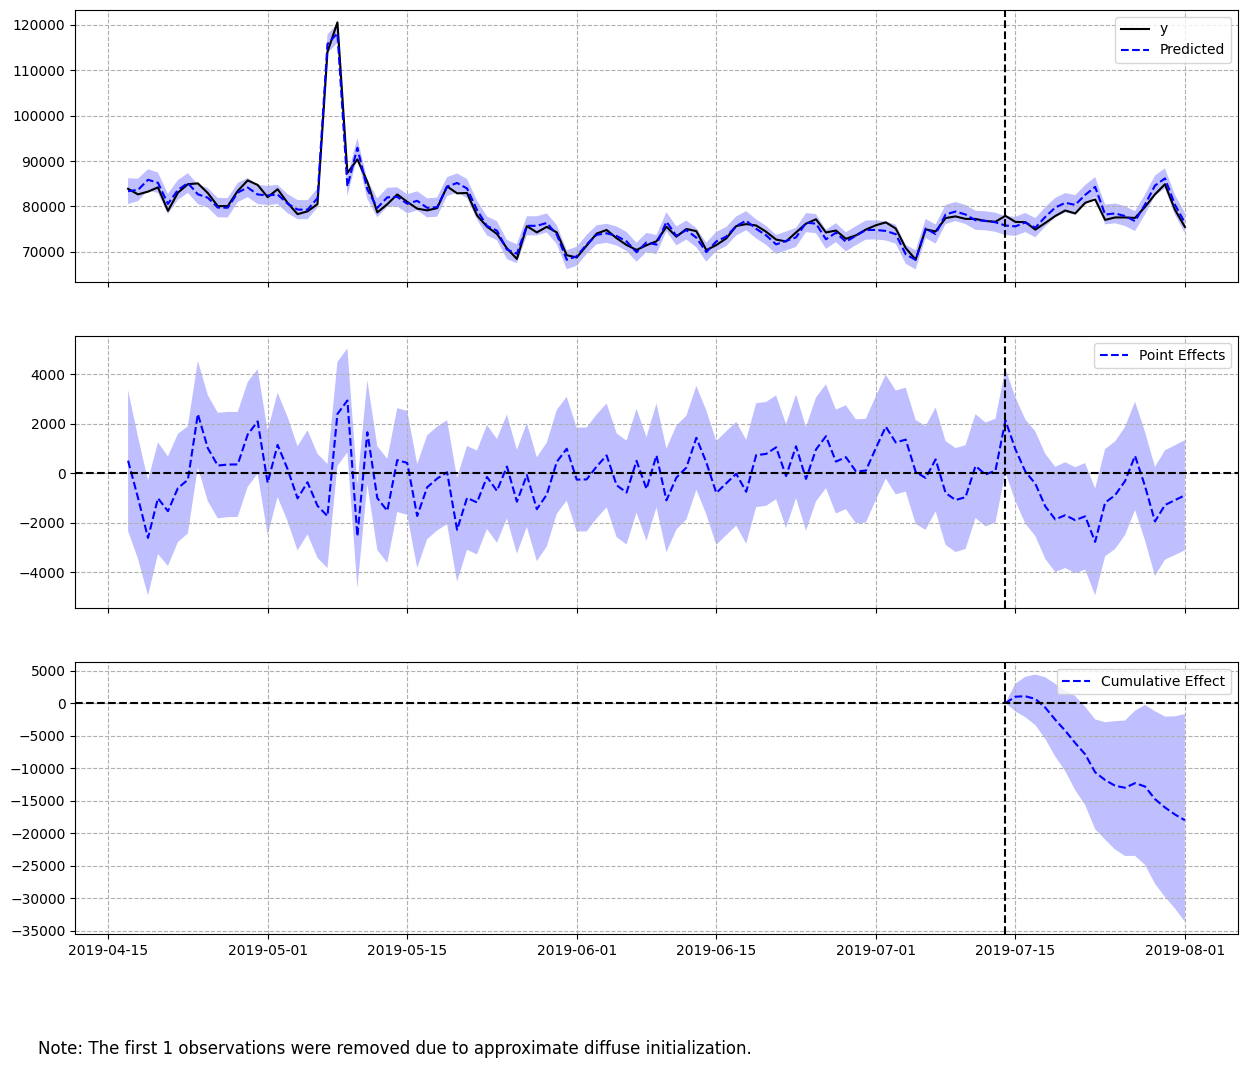

In [15]:
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

# Ejemplo Volskwagen

Trabajaremos con los valores de las acciones de tres grandes empresas, VolksWagen, BMW y Allianz, para averiguar cuáles fueron las consecuencias para VW después del escándalo de emisiones de septiembre de 2015.

In [16]:
# Read Data
data = pd.read_csv('volks_data.csv', header=0, sep=' ', index_col='Date', parse_dates=True)


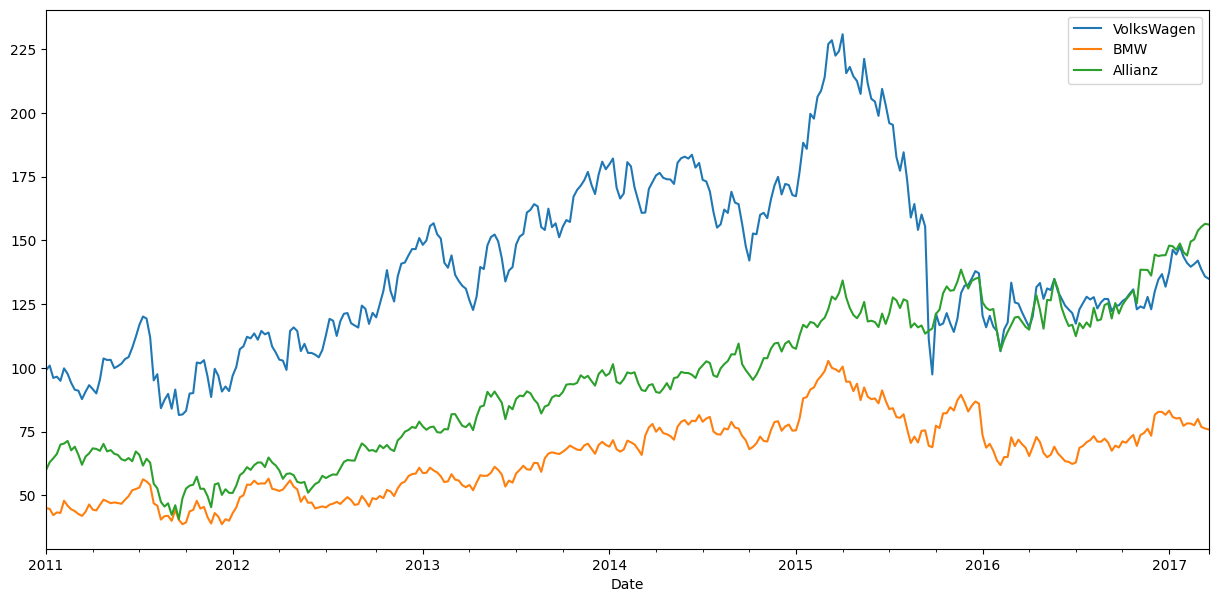

In [17]:
# plot data
data.plot(figsize=(15,7));

In [18]:
# Verificar el formato de las fechas como indice
data.index

DatetimeIndex(['2011-01-02', '2011-01-09', '2011-01-16', '2011-01-23',
               '2011-01-30', '2011-02-06', '2011-02-13', '2011-02-20',
               '2011-02-27', '2011-03-06',
               ...
               '2017-01-15', '2017-01-22', '2017-01-29', '2017-02-05',
               '2017-02-12', '2017-02-19', '2017-02-26', '2017-03-05',
               '2017-03-12', '2017-03-19'],
              dtype='datetime64[ns]', name='Date', length=325, freq=None)

Usemos statsmodels para descomponer los datos y ver si encontramos componentes significativos:

In [19]:
# Descomposición de la Serie Temporal
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data.loc[:'2015-09-13'].iloc[:, 0])

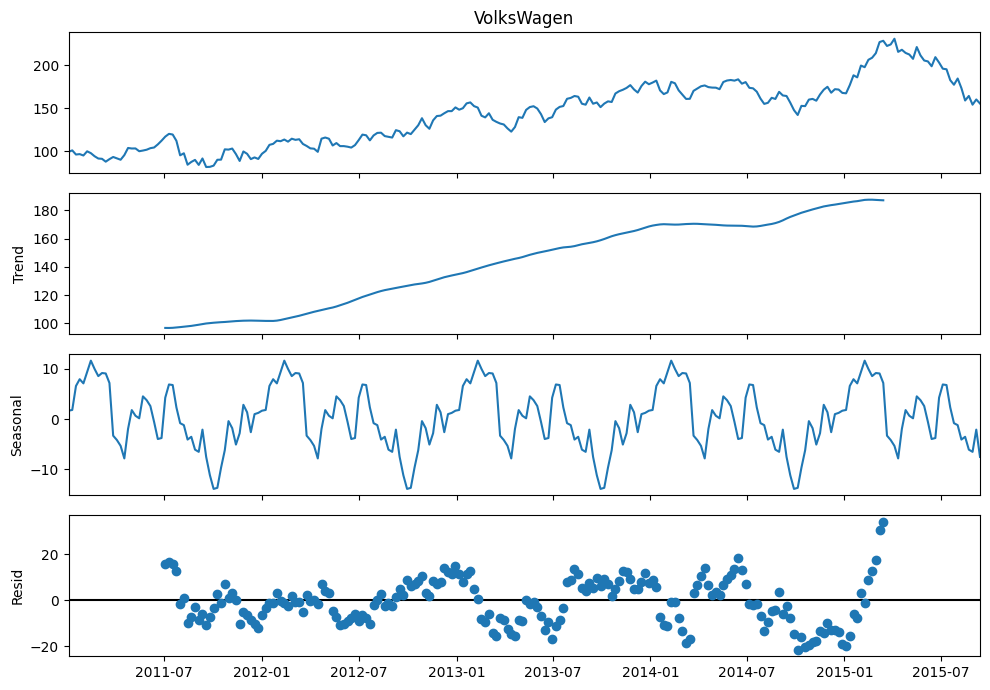

In [20]:
# Plot
import matplotlib as mpl
mpl.rc("figure", figsize=(10,7))
    
result.plot();

En un primer momento, podemos ver que alrededor de septiembre de 2015, los precios de las acciones de VolksWagen parecen caer abruptamente, mientras que la otra serie mantiene el comportamiento observado. Esto parece indicar que podemos usar ambas acciones como regresores para ayudar a pronosticar cuáles deberían ser las acciones de VW. Lo primero que haremos es ejecutar la inferencia causal considerando solo los precios de las acciones de VW para ver qué obtenemos (observe que usamos vi para el método de ajuste):

In [21]:
# Separacion de periodos antes y despues
pre_period = [str(np.min(data.index.values)), "2015-09-13"]
post_period = ["2015-09-20", str(np.max(data.index.values))]


In [22]:
# Modelo univariente
ci = CausalImpact(data.iloc[:, 0], pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'})

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.91             10026.07
Prediction (s.d.)         183.96 (3.69)      14533.13 (291.69)
95% CI                    [176.88, 191.35]   [13973.64, 15117.04]

Absolute effect (s.d.)    -57.05 (3.69)      -4507.06 (291.69)
95% CI                    [-64.44, -49.97]   [-5090.98, -3947.57]

Relative effect (s.d.)    -31.01% (2.01%)    -31.01% (2.01%)
95% CI                    [-35.03%, -27.16%] [-35.03%, -27.16%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 126.91. By contrast, in the absence of an
intervention, we would have expected an average response of 183.96.
The 95% interval of this counterfactual prediction is [176.88, 191.35].
Subtracting t

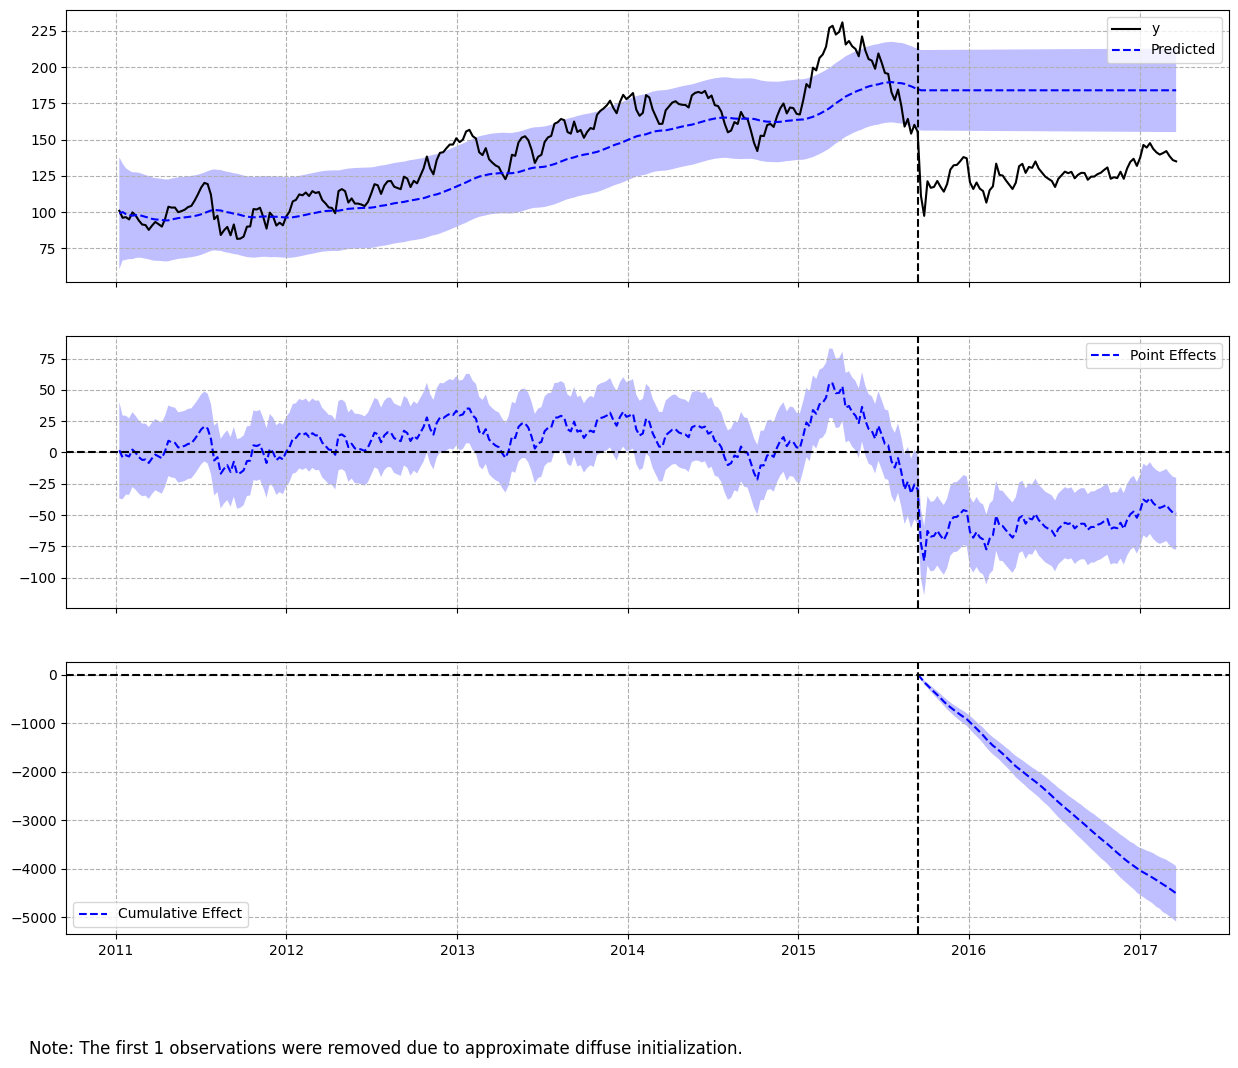

In [23]:
# Resultados Univariantes
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

## Modelo Multivariante

In [24]:
# Modelo Multivariente
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'})

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.91             10026.07
Prediction (s.d.)         171.83 (2.85)      13574.4 (225.38)
95% CI                    [166.17, 177.35]   [13127.21, 14010.69]

Absolute effect (s.d.)    -44.92 (2.85)      -3548.33 (225.38)
95% CI                    [-50.44, -39.26]   [-3984.62, -3101.15]

Relative effect (s.d.)    -26.14% (1.66%)    -26.14% (1.66%)
95% CI                    [-29.35%, -22.85%] [-29.35%, -22.85%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 126.91. By contrast, in the absence of an
intervention, we would have expected an average response of 171.83.
The 95% interval of this counterfactual prediction is [166.17, 177.35].
Subtracting th

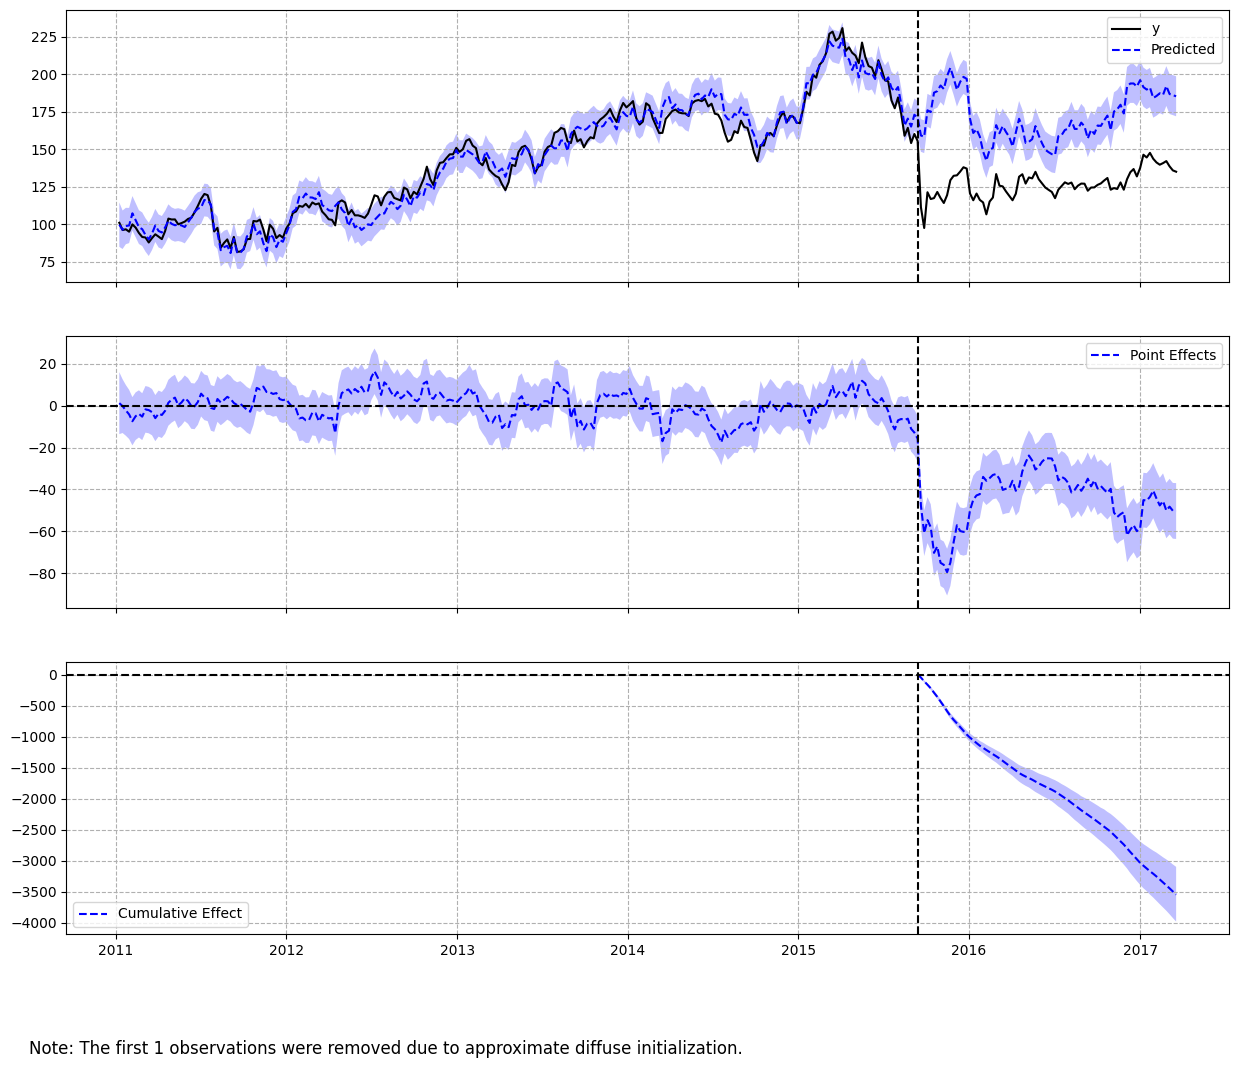

In [25]:
# Resultados Multivariantes
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()

# Ejemplo Bitcoin - PayPal

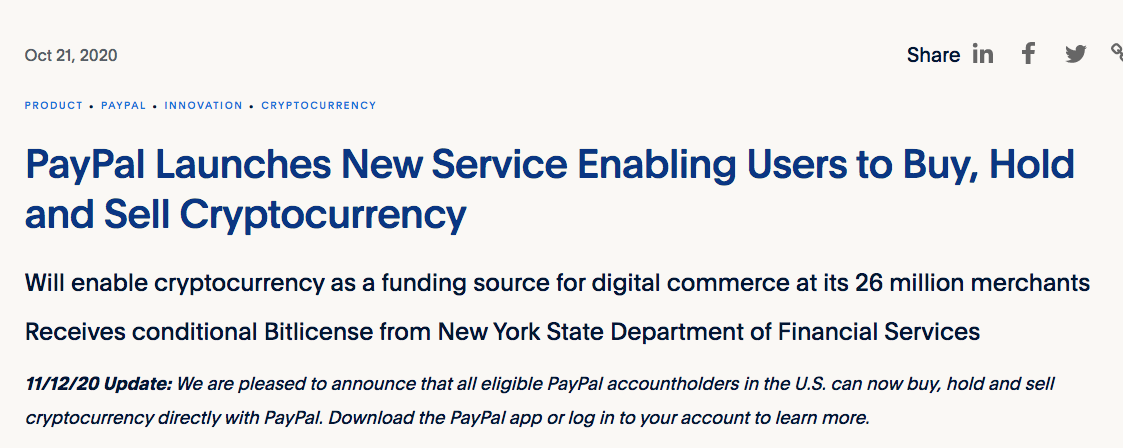

In [30]:
# Lectura de datos de yahoo finance
import yfinance as yf
data = yf.download(['BTC-USD','X', 'GOOGL', 'AAPL', 'MSFT', 'AMZN', 'META', 'GOLD'], start='2018-01-01', end='2020-12-30')['Close']
data.head()

[**********************75%***********            ]  6 of 8 completed

[*********************100%***********************]  8 of 8 completed


,AAPL,AMZN,BTC-USD,GOLD,GOOGL,META,MSFT,X
Date,,,,,,,,
2018-01-01,NaN,NaN,13657.200195,NaN,NaN,NaN,NaN,NaN
2018-01-02,43.064999,59.450500,14982.099609,15.20,53.660500,181.419998,85.949997,37.419998
2018-01-03,43.057499,60.209999,15201.000000,15.00,54.576000,184.669998,86.349998,37.490002
2018-01-04,43.257500,60.479500,15599.200195,15.03,54.787998,184.330002,87.110001,37.869999
2018-01-05,43.750000,61.457001,17429.500000,14.95,55.514500,186.850006,88.190002,38.490002


In [31]:
data 

,AAPL,AMZN,BTC-USD,GOLD,GOOGL,META,MSFT,X
Date,,,,,,,,
2018-01-01,NaN,NaN,13657.200195,NaN,NaN,NaN,NaN,NaN
2018-01-02,43.064999,59.450500,14982.099609,15.20,53.660500,181.419998,85.949997,37.419998
2018-01-03,43.057499,60.209999,15201.000000,15.00,54.576000,184.669998,86.349998,37.490002
2018-01-04,43.257500,60.479500,15599.200195,15.03,54.787998,184.330002,87.110001,37.869999
2018-01-05,43.750000,61.457001,17429.500000,14.95,55.514500,186.850006,88.190002,38.490002
...,...,...,...,...,...,...,...,...
2020-12-25,NaN,NaN,24664.791016,NaN,NaN,NaN,NaN,NaN
2020-12-26,NaN,NaN,26437.037109,NaN,NaN,NaN,NaN,NaN
2020-12-27,NaN,NaN,26272.294922,NaN,NaN,NaN,NaN,NaN


In [32]:
# Serie semanal
data = data.resample('W-Fri').last().astype(np.float32)
data.head()

,AAPL,AMZN,BTC-USD,GOLD,GOOGL,META,MSFT,X
Date,,,,,,,,
2018-01-05,43.750000,61.457001,17429.500000,14.95,55.514500,186.850006,88.190002,38.490002
2018-01-12,44.272499,65.260002,13980.599609,15.12,56.532501,179.369995,89.599998,39.139999
2018-01-19,44.615002,64.728996,11607.400391,14.37,57.174999,181.289993,90.000000,38.770000
2018-01-26,42.877499,70.102501,11171.400391,14.75,59.377998,190.000000,94.059998,40.950001
2018-02-02,40.125000,71.497498,8830.750000,13.74,55.959999,190.279999,91.779999,34.580002


In [33]:
# Primero la variable objetivo
data=data[['BTC-USD','X', 'GOOGL', 'AAPL', 'MSFT', 'AMZN', 'META', 'GOLD']]
data.head()

,BTC-USD,X,GOOGL,AAPL,MSFT,AMZN,META,GOLD
Date,,,,,,,,
2018-01-05,17429.500000,38.490002,55.514500,43.750000,88.190002,61.457001,186.850006,14.95
2018-01-12,13980.599609,39.139999,56.532501,44.272499,89.599998,65.260002,179.369995,15.12
2018-01-19,11607.400391,38.770000,57.174999,44.615002,90.000000,64.728996,181.289993,14.37
2018-01-26,11171.400391,40.950001,59.377998,42.877499,94.059998,70.102501,190.000000,14.75
2018-02-02,8830.750000,34.580002,55.959999,40.125000,91.779999,71.497498,190.279999,13.74


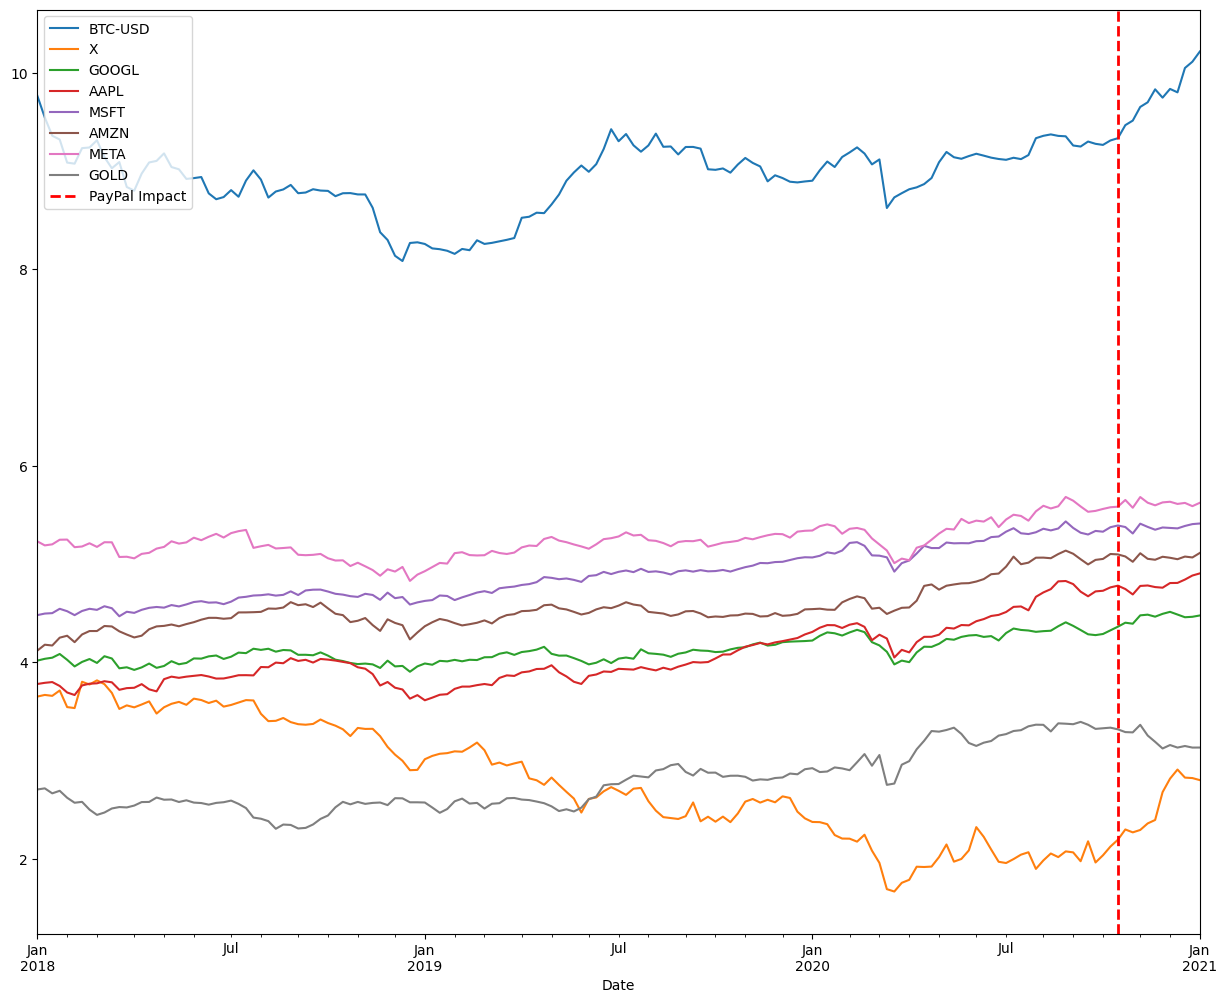

In [34]:
# Transformacion log Plot. Escala
import matplotlib.pyplot as plt
np.log(data).plot(figsize=(15, 12))
plt.axvline('2020-10-14', 0, np.max(data['BTC-USD']), lw=2, ls='--', c='red', label='PayPal Impact')
plt.legend(loc='upper left')

In [35]:
data.index

DatetimeIndex(['2018-01-05', '2018-01-12', '2018-01-19', '2018-01-26',
               '2018-02-02', '2018-02-09', '2018-02-16', '2018-02-23',
               '2018-03-02', '2018-03-09',
               ...
               '2020-10-30', '2020-11-06', '2020-11-13', '2020-11-20',
               '2020-11-27', '2020-12-04', '2020-12-11', '2020-12-18',
               '2020-12-25', '2021-01-01'],
              dtype='datetime64[ns]', name='Date', length=157, freq='W-FRI')

In [36]:
# Estimar el modelo
pre_period=['2018-01-05', '2020-10-16']
post_period=['2020-10-23', '2020-11-27']

ci = CausalImpact(data.iloc[:, 0], pre_period, post_period)

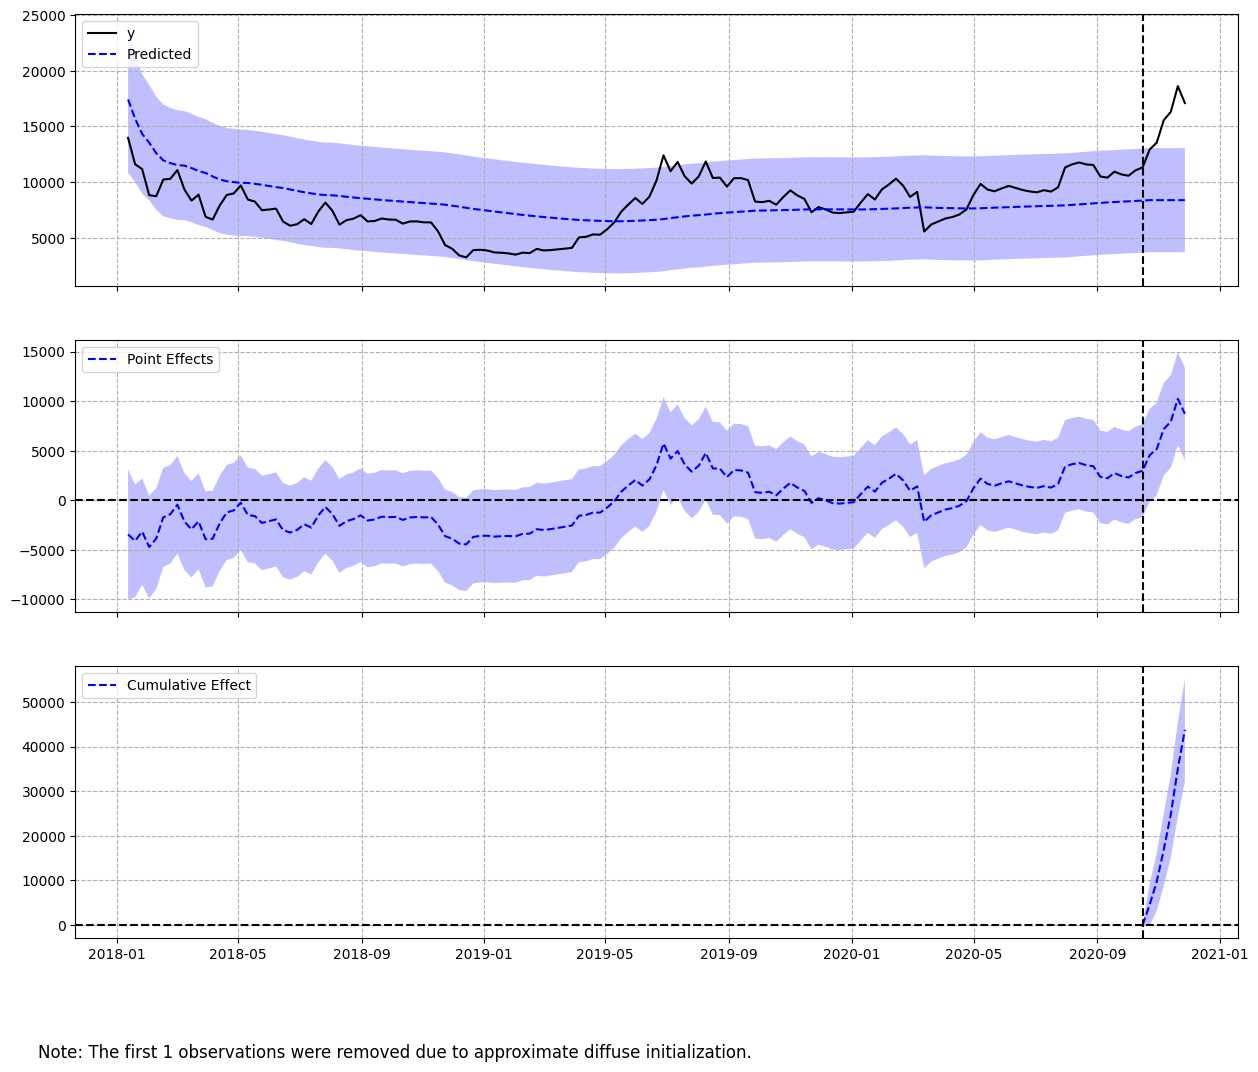

In [37]:
# grafico de resultados
ci.plot()

In [38]:
# Resultados
print(ci.summary())
print(ci.summary(output='report'))

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    15681.91           94091.47
Prediction (s.d.)         8384.36 (984.12)   50306.13 (5904.75)
95% CI                    [6469.15, 10326.85][38814.93, 61961.1]

Absolute effect (s.d.)    7297.56 (984.12)   43785.34 (5904.75)
95% CI                    [5355.06, 9212.76] [32130.37, 55276.54]

Relative effect (s.d.)    87.04% (11.74%)    87.04% (11.74%)
95% CI                    [63.87%, 109.88%]  [63.87%, 109.88%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 15681.91. By contrast, in the absence of an
intervention, we would have expected an average response of 8384.36.
The 95% interval of this counterfactual prediction is [6469.15, 10326.85].
Subtrac

# Hiperparámetros

In [39]:
# Read Data
data = pd.read_csv('volks_data.csv', header=0, sep=' ', index_col='Date', parse_dates=True)


In [40]:
data.tail()

,VolksWagen,BMW,Allianz
Date,,,
2017-02-19,140.714554,77.506943,150.379196
2017-02-26,142.064346,80.036842,153.777069
2017-03-05,138.545258,76.853775,155.338257
2017-03-12,135.845703,76.255798,156.486191
2017-03-19,134.977997,75.897003,156.210693


In [41]:
# Separacion de periodos antes y despues
pre_period = [str(np.min(data.index.values)), "2015-09-13"]
post_period = ["2015-09-20", str(np.max(data.index.values))]


In [42]:
# Modelo univariente
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'})

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


In [43]:
# Resultados Univariantes
print(ci.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    126.91             10026.07
Prediction (s.d.)         171.83 (3.07)      13574.4 (242.92)
95% CI                    [165.81, 177.86]   [13098.62, 14050.84]

Absolute effect (s.d.)    -44.92 (3.07)      -3548.33 (242.92)
95% CI                    [-50.95, -38.89]   [-4024.77, -3072.56]

Relative effect (s.d.)    -26.14% (1.79%)    -26.14% (1.79%)
95% CI                    [-29.65%, -22.63%] [-29.65%, -22.63%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


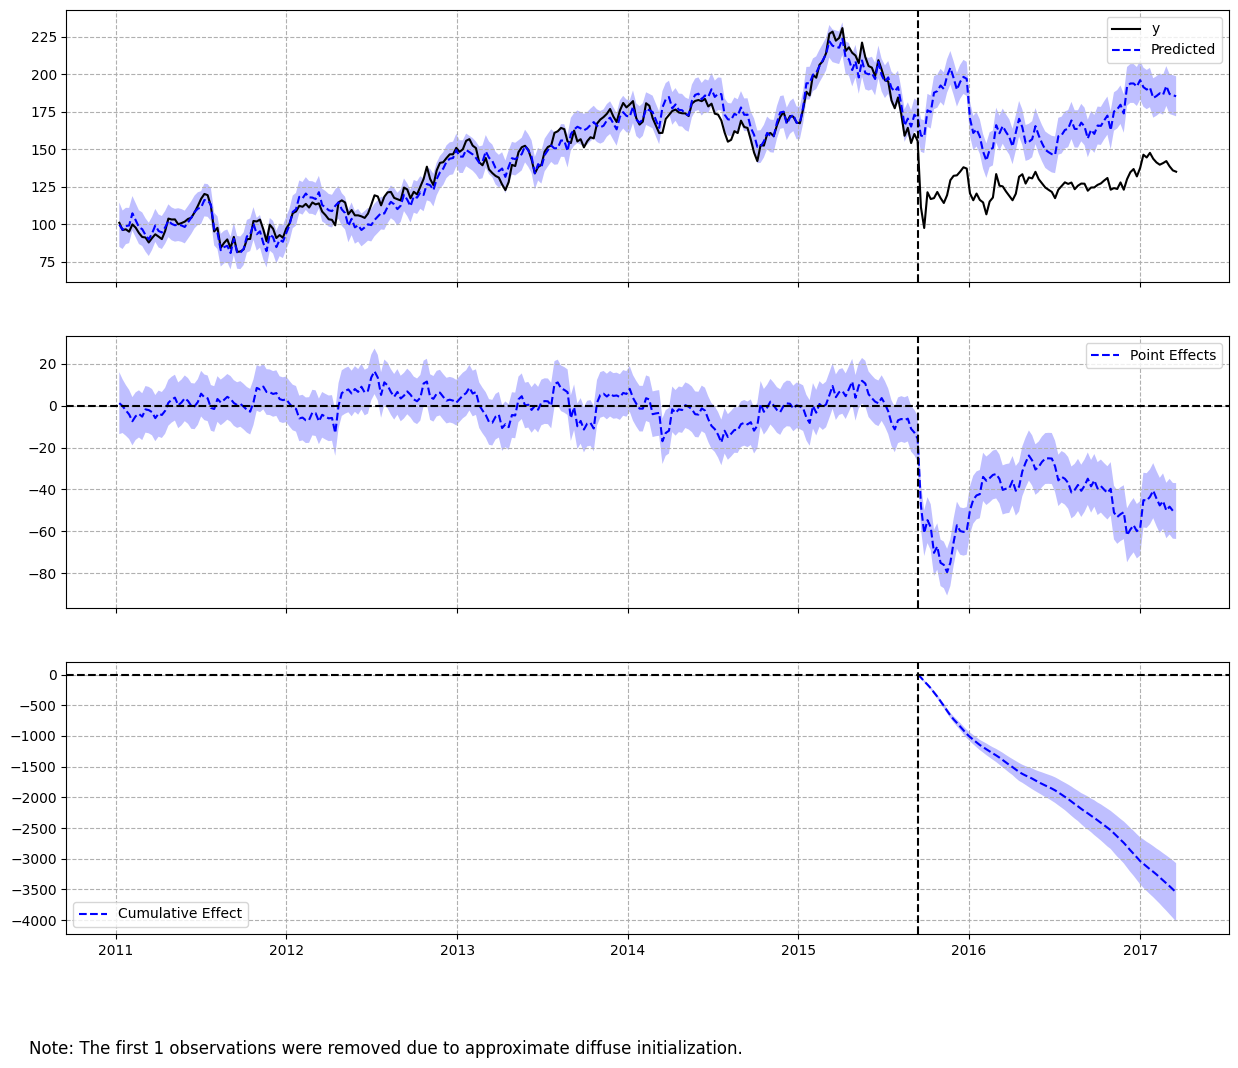

In [44]:
ci.plot()

**Ajuste de hiperparámetros niter**  

`niter` es el número de muestras MCMC.   
La inferencia bayesiana generalmente necesita al menos 1000 muestras para obtener resultados razonables.   
El valor predeterminado para nitro en el paquete CausalImpact es 1000 y lo cambiamos a 3000.

In [ ]:
# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'},niter=3000)
# Causal impact summary
print(ci.summary())

**Ajuste de hiperparámetros standardize_data**

`standardize_data` es un valor booleano que indica si estandarizar todas las series temporales antes de ajustar el modelo.

El valor por defecto es verdadero.

En este ejemplo, establecemos `standardize_data = False`.

In [ ]:
# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'},standardize_data=False)
# Causal impact summary
print(ci.summary())

**Ajuste de hiperparámetros para prior_level_sd**


`prior_level_sd` es la desviación estándar gaussiana de nivel local anterior.


El valor predeterminado para `prior_level_sd` es 0,01. 

Este valor predeterminado suele funcionar bien para series temporales estables con baja volatilidad residual después de controlar las covariables.

Cuando existe incertidumbre sobre la estabilidad de los datos, la documentación del paquete CausalImpact sugiere configurar `prior_level_sd` en 0.1 como una opción más segura. 


Pero esta opción puede dar lugar a intervalos de predicción muy amplios.

Al configurar `prior_level_sd=None`, el paquete python `statsmodel` realiza la optimización para el componente anterior en el nivel local. 

La documentación de pycausalimpac recomienda encarecidamente configurar `prior_level_sd` como `None` cuando se usa la versión de Python del paquete.

In [ ]:

# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'},prior_level_sd=0.1)
# Causal impact summary
print(ci.summary())


In [ ]:
# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'},prior_level_sd=None)
# Causal impact summary
print(ci.summary())

In [ ]:
ci.plot()


**Sintonización de hiperparámetros por seasons**

`nseasons` especifica los componentes estacionales del modelo.

El valor predeterminado es 1, lo que significa que no hay estacionalidad en los datos de la serie temporal.

Cambiar el valor a un entero positivo mayor que 1 incluye automáticamente el componente estacional. 

Por ejemplo, `nseason=7` significa que hay estacionalidad semanal en datos diarios.

Actualmente, el paquete CausalImpact solo admite un componente estacional, pero podemos incluir varios componentes estacionales utilizando el modelo Bayesian Structural Time Series (BSTS) y pasar el modelo ajustado como bsts.model.

En este ejemplo, configuraremos el hiperparámetro `nseason=52` para incluir la estacionalidad anual de los datos semanales.

**Ya lo estabamos utilizando**

In [ ]:
# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'})
# Causal impact summary
print(ci.summary())

**Ajuste de hiperparámetros para season_duration**

`season_duration` especifica el número de puntos de datos en cada temporada.

El valor predeterminado para la duración_estacional es 1. 

Por ejemplo, `nseason=[{'período': 7}]`, `season_duration=1` significa que los datos de la serie temporal tienen estacionalidad semanal y cada punto de datos representa un día.


Si deseamos incluir con datos diarios la estacionalidad mensual, `nseasons` debe establecerse en 12 y `season_duration` debe establecerse en 30, lo que indica que cada 30 días representan un mes.

En este ejemplo, usaremos `nseason=[{'period': 12}]`, y `season_duration=4` para los hiperparámetros.

In [ ]:
# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'fit_method': 'vi'},nseasons=[{'period': 12}], seasonal_duration=4)
# Causal impact summary
print(ci.summary())


**Ajuste de hiperparámetros para dynamic_regression**


`dynamic_regression` es un valor booleano que indica si se deben incluir coeficientes de regresión variables en el tiempo.

Dado que la inclusión de una tendencia local que varía con el tiempo o un nivel local que varía con el tiempo a menudo conduce a una especificación excesiva, este hiperparámetro tiene como valor predeterminado `FALSE`.

Podemos cambiar manualmente el valor a `TRUE `si los datos tienen tendencias locales para ciertos períodos de tiempo.


In [ ]:
# Causal impact model
ci = CausalImpact(data, pre_period, post_period, model_args={'nseasons': 52, 'fit_method': 'vi'},dynamic_regression=True)
# Causal impact summary
print(ci.summary())



In [ ]:
ci.plot()